# WorldWide Internet Prices

1. [Preprocess data](#section1)  
   1.1 [Features description](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Convert types](#section1.3)    
   1.4 [Data distribution](#section1.4)
2. [Internet prices relative to GDP](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2 לבדוק לפי יבשות ניצול אינטרנט וסיבה לצריכה הקיצונית|מינימלית

In [4]:
#3 ההפרשים בין עלויות חבליות 2020 ו2021|||הפער שיווקי בין חבילה חודשית חד פעמית לחבילת קבע

Read and show data

In [5]:
data_url = 'https://raw.githubusercontent.com/RonAlfi/worldwide-internet-1GB-speed-2021-2022/main/Internet%20Prices%20Data.csv'
internet_df = pd.read_csv(data_url)
internet_df.head(5)

,S.NO,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291",37.15
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533",9.50


---
<a id='section1'></a>
### 1. Preprocess data</br>

<a id='section1.1'></a>
#### 1.1 Features description
Rename features to simpler names:

In [6]:
internet_df.set_index('S.NO', inplace=True)
internet_df.rename(
    columns={
        "Continental region": "Region",
        "NO. OF Internet Plans": "Internet Plans",
        "Average price of 1GB (USD)": "Average Price",
        "Cheapest 1GB for 30 days (USD)": "Lowest Price", 
        "Most expensive 1GB (USD)" : "Highest Price", 
        "Average price of 1GB (USD  at the start of 2021)": "Avg price 2021", 
        "Average price of 1GB (USD – at start of 2020)": "Avg price 2020",
        "Avg \n(Mbit/s)Ookla": "Avg speed"
    }, inplace=True)

<ul>
    <li>Country - The country name.</li>
    <li>Country code - unique shortcut of the country name.</li>
    <li>Region - of the world to which the country belongs.</li>
    <li>Internet Plans - number of internet services offered for purchase in the country.</li>
    <li>Averge Price - for 1GB in US dollars.</li>
    <li>Lowest Price - for 1GB in US dollars.</li>
    <li>Highest Price - for 1GB in US dollars.</li>
    <li>Avg price 2021 - average price for 1GB in 2021 in US dollars.</li>
    <li>Avg price 2020 - average price for 1GB in 2020 in US dollars.</li>
    <li>Internet users - number of internet users in the country.</li>
    <li>Population - number of people residing in the country.</li>
    <li>Avg speed - internet speed. Number of MB per second as tested by Ookla.</li>
</ul>

<a id='section1.2'></a>
#### 1.2 Missing values

In [7]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 243
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    242 non-null    object 
 1   Country         242 non-null    object 
 2   Region          242 non-null    object 
 3   Internet Plans  231 non-null    float64
 4   Average Price   242 non-null    object 
 5   Lowest Price    231 non-null    float64
 6   Highest Price   231 non-null    float64
 7   Avg price 2021  231 non-null    object 
 8   Avg price 2020  231 non-null    object 
 9   Internet users  212 non-null    object 
 10  Population      210 non-null    object 
 11  Avg speed       141 non-null    float64
dtypes: float64(4), object(8)
memory usage: 24.6+ KB


Drop 'Avg speed' which has a lot of missing values.

In [8]:
internet_df.drop('Avg speed', axis=1, inplace=True)

Drop all countries with no internet services or duplicates.

In [9]:
internet_df.dropna(subset='Internet Plans', inplace=True)
internet_df.drop_duplicates(subset=['Country code'], inplace=True)
internet_df.reset_index(drop=True, inplace=True)
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country code    229 non-null    object 
 1   Country         229 non-null    object 
 2   Region          229 non-null    object 
 3   Internet Plans  229 non-null    float64
 4   Average Price   229 non-null    object 
 5   Lowest Price    229 non-null    float64
 6   Highest Price   229 non-null    float64
 7   Avg price 2021  229 non-null    object 
 8   Avg price 2020  229 non-null    object 
 9   Internet users  203 non-null    object 
 10  Population      201 non-null    object 
dtypes: float64(3), object(8)
memory usage: 19.8+ KB


<a id='section1.3'></a>
#### 1.3 Convert types

In [10]:
internet_df = internet_df.convert_dtypes()
internet_df.dtypes

Country code       string
Country            string
Region             string
Internet Plans      Int64
Average Price      string
Lowest Price      Float64
Highest Price     Float64
Avg price 2021     string
Avg price 2020     string
Internet users     string
Population         string
dtype: object

Some of the features converted to string and not numeric.  
Lets search what string they contain.

In [11]:
internet_df[
    (internet_df['Average Price'].str.contains('^[0-9]', regex=True) == False) | 
    (internet_df['Avg price 2020'].str.contains('^[0-9]', regex=True) == False) |
    (internet_df['Avg price 2021'].str.contains('^[0-9]', regex=True) == False)
]

,Country code,Country,Region,Internet Plans,Average Price,Lowest Price,Highest Price,Avg price 2021,Avg price 2020,Internet users,Population
159,CK,Cook Islands,OCEANIA,9,3.5,1.49,11.42,NO PACKAGES,5.56,<NA>,<NA>
193,VU,Vanuatu,OCEANIA,23,6.06,0.75,28.23,4.25,NO PACKAGES,"71,050","292,680"
194,TV,Tuvalu,OCEANIA,9,6.35,5.72,10.17,NO PACKAGES,12.42,"5,520","11,508"
202,CU,Cuba,CARIBBEAN,9,7.5,3.2,12.5,13.33,NO PACKAGES,"5,638,956","11,338,134"
218,CC,Cocos (Keeling) Islands,OCEANIA,2,13.47,7.62,19.32,16.98,NO PACKAGES,<NA>,<NA>


In [12]:
internet_df['Avg price 2020'].replace("NO PACKAGES", '0', inplace=True)
internet_df['Avg price 2021'].replace("NO PACKAGES", '0', inplace=True)

Remove the comma from the last two features so we can convert them to numbers.

In [13]:
internet_df['Internet users'] = internet_df['Internet users'].str.replace(',', '')
internet_df['Population'] = internet_df['Population'].str.replace(',', '')

Cast correct data types on features

In [14]:
internet_df = internet_df.astype({
    'Average Price': 'float', 
    'Avg price 2020': 'float', 
    'Avg price 2021': 'float',
    'Internet users': 'float',
    'Population': 'float'
})
internet_df.dtypes

Country code       string
Country            string
Region             string
Internet Plans      Int64
Average Price     float64
Lowest Price      Float64
Highest Price     Float64
Avg price 2021    float64
Avg price 2020    float64
Internet users    float64
Population        float64
dtype: object

<a id='section1.4'></a>
#### 1.4 Data distribution

In [15]:
features = ['Internet Plans', 'Average Price', 'Lowest Price', 'Highest Price', 
            'Avg price 2020', 'Avg price 2021', 'Internet users', 'Population']
melted_internet_df = pd.melt(internet_df[features], value_vars = features)

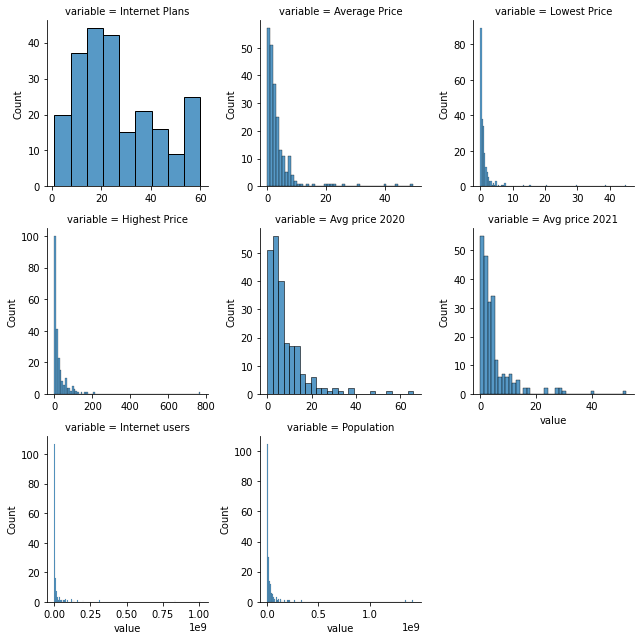

In [16]:
g = sns.FacetGrid(data = melted_internet_df, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='value')
plt.show()

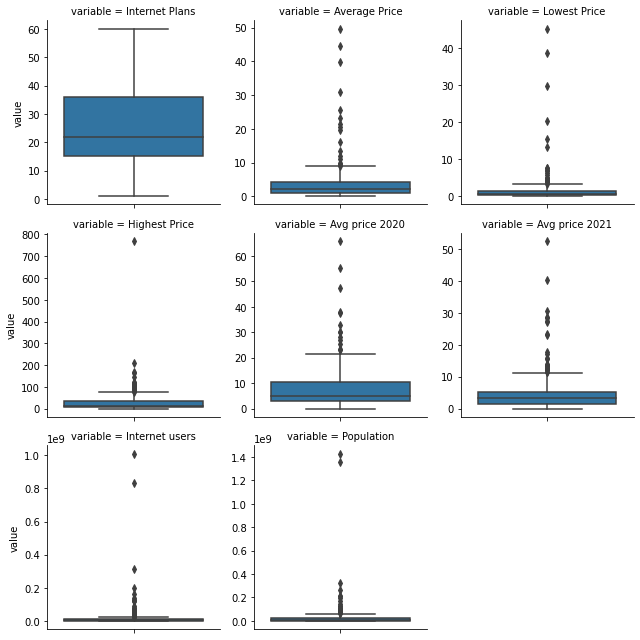

In [17]:
g = sns.FacetGrid(data = melted_internet_df, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, y='value')
plt.show()

---
<a id='section2'></a>
### 2. Internet prices relative to GDP

Examine Which region of the world pays the most for internet and which region pays the least.

In [141]:
features = ['Region', 'Average Price', 'Lowest Price', 'Highest Price']
melted_internet_df = pd.melt(internet_df[features], id_vars='Region', value_vars = features)
# sort region by average price
avg_sorted = internet_df.groupby('Region')['Average Price'].mean().reset_index().sort_values('Average Price')

[(0.0, 130.0), Text(0.5, 6.79999999999999, '1GB Highest price')]

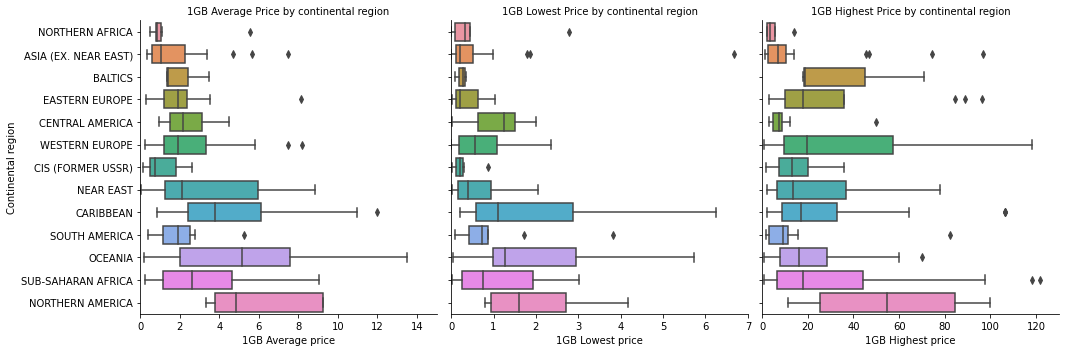

In [142]:
g = sns.catplot(
    data=melted_internet_df, x='value', y='Region', col='variable', 
    kind='box', col_wrap=3, order=avg_sorted['Region'], sharex=False
)
g.set_titles(col_template="1GB {col_name} by continental region")
g.set_ylabels('Continental region')
g.axes[0].set(xlim=(0, 15), xlabel='1GB Average price')
g.axes[1].set(xlim=(0, 7), xlabel='1GB Lowest price')
g.axes[2].set(xlim=(0, 130), xlabel='1GB Highest price')

<b>Conclusion</b>:  
Regions that pay the most: Northern America, Oceania, Sub-Saharan Africa and Caribbean.  
Regions that pay the least: Northern Africa, CIS (former USSR) South and Central America.